In [1]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels import stats
from statsmodels.stats.multitest import fdrcorrection
import pandas as pd

In [2]:
df_corrected = pd.read_csv("corrected_p_val_rho_ECOGSTN.csv")

sprho_arr_delta_STN = np.load('sprho_arr_delta_STN.npy')
sprho_arr_pred_STN = np.load('sprho_arr_pred_STN.npy')
sprho_arr_delta_ECOG = np.load('sprho_arr_delta_ECOG.npy')
sprho_arr_pred_ECOG = np.load('sprho_arr_pred_ECOG.npy')
epoch_lim = 30
x_ = np.arange(-epoch_lim, epoch_lim, 1)*0.1

df = pd.DataFrame({"time_point[s]" : x_,
            "rho_ECOG" : sprho_arr_pred_ECOG[:,0], 
             "p_ECOG" : sprho_arr_pred_ECOG[:,1], 
             "rho_STN" : sprho_arr_pred_STN[:,0],
             "p_STN" : sprho_arr_pred_STN[:,1], })

In [53]:
df.to_csv("p_val_rho_ECOGSTN.csv")

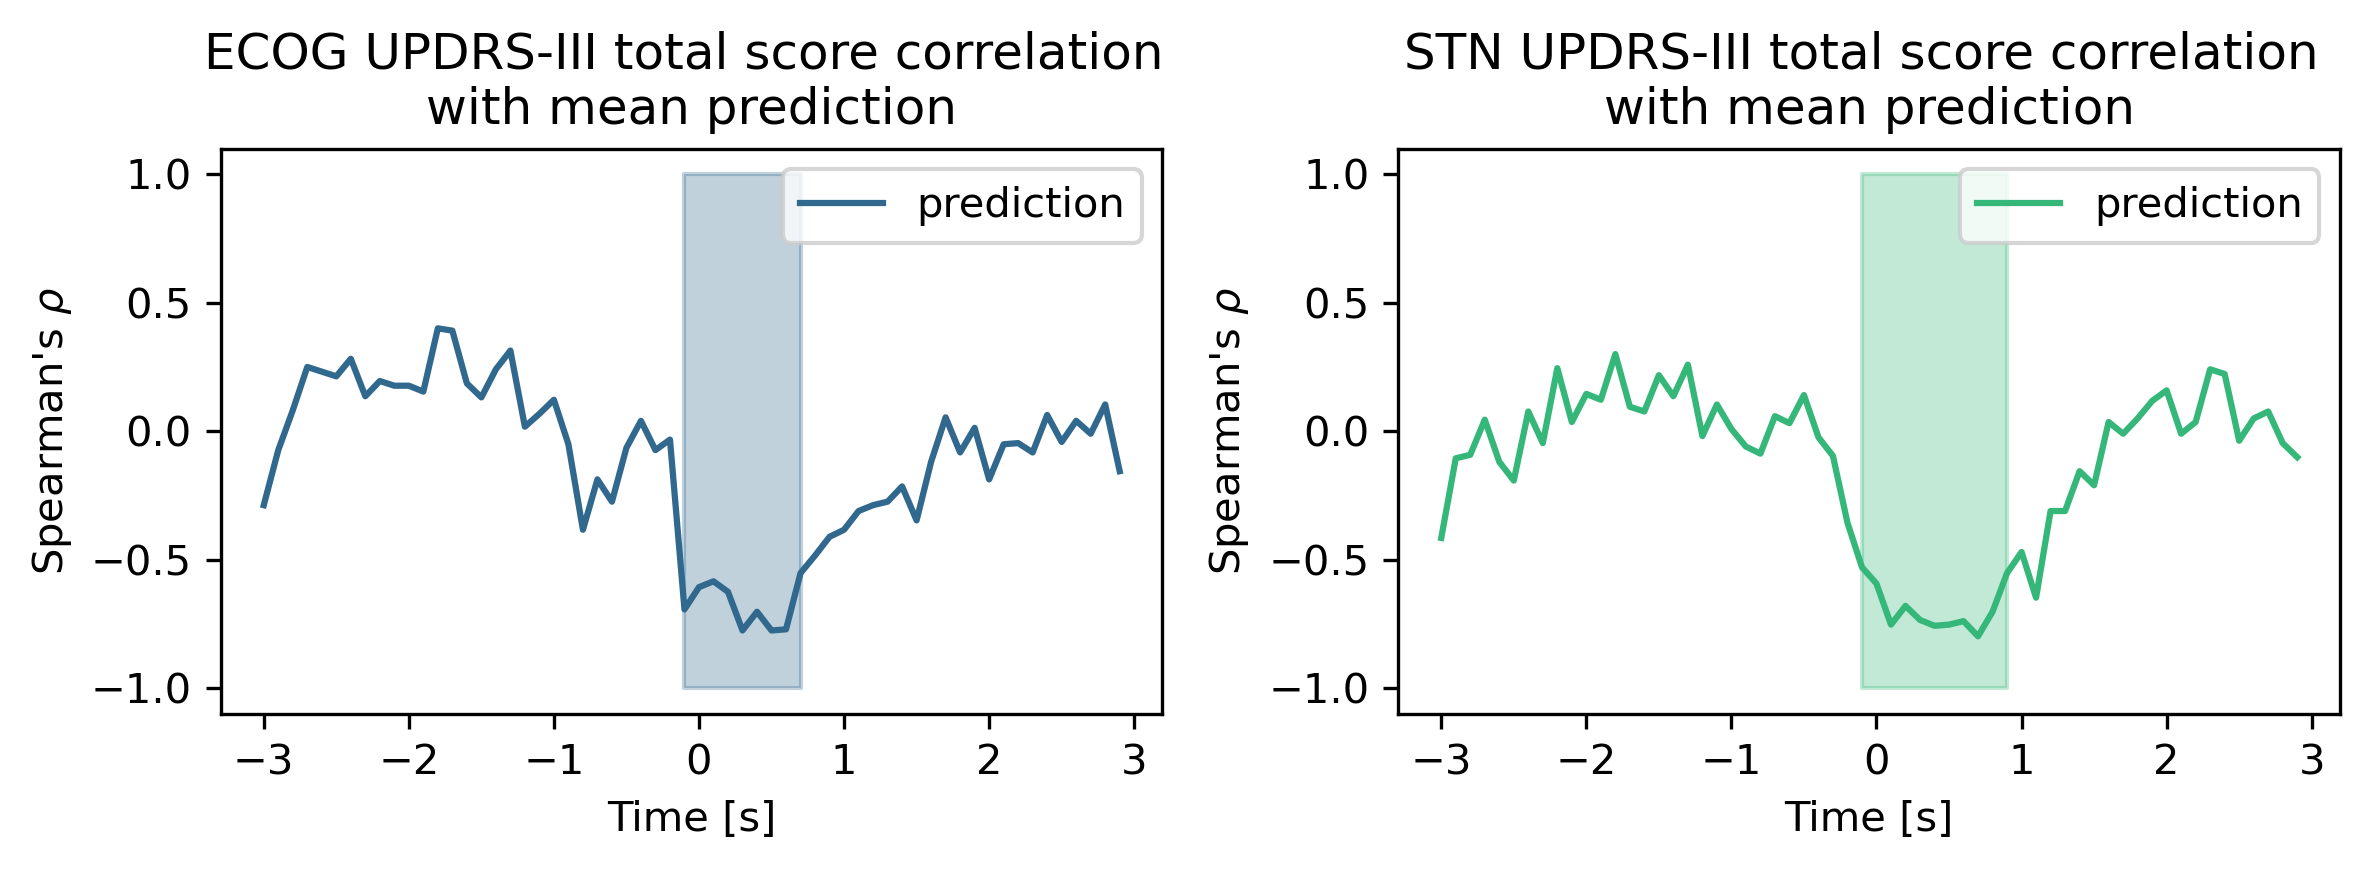

In [3]:
plt.figure(figsize=(8,3), dpi=300)
plt.subplot(121)
x_ = np.arange(-epoch_lim, epoch_lim, 1)*0.1
plt.plot(x_, sprho_arr_pred_ECOG[:,0], label="prediction", color=(49/255,104/255,142/255))
plt.fill_between(x_, -1,1, where=np.array(df_corrected["p_ECOG_clustercorrected"] == 0), alpha=0.3, color=(49/255,104/255,142/255))
plt.ylabel("Spearman's "+r"$\rho$")
plt.xlabel("Time [s]")
plt.legend()
plt.title("ECOG UPDRS-III total score correlation \nwith mean prediction")

plt.subplot(122)
x_ = np.arange(-epoch_lim, epoch_lim, 1)*0.1
#plt.plot(x_, sprho_arr_delta, label="label - prediction", color=(49/255,104/255,142/255))
plt.plot(x_, sprho_arr_pred_STN[:,0], label = "prediction",color=(53/255,183/255,121/255))
plt.fill_between(x_, -1,1, where=np.array(df_corrected["p_STN_clustercorrected"] == 0), alpha=0.3, color=(53/255,183/255,121/255))
plt.ylabel("Spearman's "+r"$\rho$")
plt.xlabel("Time [s]")
plt.legend()
plt.title("STN UPDRS-III total score correlation \nwith mean prediction")
plt.tight_layout()

plt.savefig("Figure 5 - temporal correlation.pdf", bbox_inches='tight', dpi=300)
